** Referencia: **
- http://dump.jazzido.com/CNPHV2010-RADIO/ 
- http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### ** Variables en el CENSO 2010 (INDEC) **

- VIVIENDA.INCALCONS	Calidad constructiva de la vivienda
- VIVIENDA.INCALSERV	Calidad de Conexiones a Servicios Básicos
- VIVIENDA.INMAT	Calidad de los materiales
- VIVIENDA.TIPVV	Tipo de vivienda agrupado
- VIVIENDA.TOTHOG	Cantidad de Hogares en la Vivienda
- VIVIENDA.URP	Area Urbano - Rural
- VIVIENDA.V00	Tipo de vivienda colectiva
- VIVIENDA.V01	Tipo de vivienda particular
- VIVIENDA.V02	Condición de ocupación
- HOGAR.ALGUNBI	Al menos un indicador NBI
- HOGAR.H05	Material predominante de los pisos
- HOGAR.H06	Material predominante de la cubierta exterior del techo
- HOGAR.H07	Revestimiento interior o cielorraso del techo
- HOGAR.H08	Tenencia de agua
- HOGAR.H09	Procedencia del agua para beber y cocinar
- HOGAR.H10	Tiene baño / letrina
- HOGAR.H11	Tiene botón, cadena, mochila para limpieza del inodoro
- HOGAR.H12	Desagüe del inodoro
- HOGAR.H13	Baño / letrina de uso exclusivo
- HOGAR.H14	Combustible usado principalmente para cocinar
- HOGAR.H15	Total de habitaciones o piezas para dormir
- HOGAR.H19A	Heladera
- HOGAR.H19B	Computadora
- HOGAR.H19C	Teléfono celular
- HOGAR.H19D	Teléfono de línea
- HOGAR.INDHAC	Hacinamiento
- HOGAR.NHOG	Número del hogar en la vivienda
- HOGAR.PROP	Régimen de tenencia
- HOGAR.TOTPERS	Total de Personas en el Hogar
- PERSONA.CONDACT	Condición de actividad
- PERSONA.EDADAGRU	Edad en grandes grupos
- PERSONA.EDADQUI	Edades quinquenales
- PERSONA.P01	Relación o parentesco con el jefe(a) del hogar
- PERSONA.P02	Sexo
- PERSONA.P03	Edad
- PERSONA.P05	En que país nació
- PERSONA.P07	Sabe leer y escribir
- PERSONA.P08	Condición de asistencia escolar
- PERSONA.P09	Nivel educativo que cursa o cursó
- PERSONA.P10	Completó el nivel
- PERSONA.P12	Utiliza computadora

# Required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import simpledbf
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Functions

In [2]:
def getEPHdbf(censusstring):
    print ("Downloading", censusstring)
    ### First I will check that it is not already there
    if not os.path.isfile("data/Individual_" + censusstring + ".DBF"):
        if os.path.isfile('Individual_' + censusstring + ".DBF"):
            # if in the current dir just move it
            if os.system("mv " + 'Individual_' + censusstring + ".DBF " + "data/"):
                print ("Error moving file!, Please check!")
        # otherwise start looking for the zip file
        else:
            if not os.path.isfile("data/" + censusstring + "_dbf.zip"):
                if not os.path.isfile(censusstring + "_dbf.zip"):
                    os.system(
                        "curl -O http://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/" + censusstring + "_dbf.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + censusstring + "_dbf.zip " + "data/")
            ### unzip the csv
            os.system("unzip " + "data/" + censusstring + "_dbf.zip -d data/")

    if not os.path.isfile("data/" + 'Individual_' + censusstring + ".dbf"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, creating CSV file")

    trimestre = censusstring

    dbf = simpledbf.Dbf5('data/Individual_' + trimestre + '.dbf',codec='latin1')
    df_def = dbf.to_dataframe()

#     df_def_i = df_def.loc[df_def.REGION == 1, ['CODUSU','NRO_HOGAR','PONDERA','CH03','CH04',
#                                             'CH06','CH07','CH08','CH09','CH12','CH13',
#                                             'CH15','CH16','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC',
# #                                             'PP02C2','PP02C3','PP02C4','PP02C5','PP02C6','PP02C7','PP02C8',
# #                                             'PP02E','PP02H','PP02I','PP03C','PP03D','PP3E_TOT','PP3F_TOT',
# #                                             'PP03G','PP03H','PP03I','PP03J','INTENSI','PP04A',
# #                                             'PP04B1','PP04B2',
# #                                             'PP04C','PP04C99','PP04G','PP05C_1','PP05C_2',
# #                                             'PP05C_3','PP05E','PP05F','PP05H','PP06A','PP06C','PP06D',
# #                                             'PP06E','PP06H','PP07A','PP07C','PP07D','PP07E','PP07F1',
# #                                             'PP07F2','PP07F3','PP07F4','PP07F5','PP07G1','PP07G2','PP07G3',
# #                                             'PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K','PP08D1',
# #                                             'PP08D4','PP08F1','PP08F2','PP08J1','PP08J2','PP08J3','PP09A',
# #                                             'PP10A','PP10C','PP10D',
# #                                             'PP10E','PP11A','PP11B1','PP11C','PP11C99',
# #                                             'PP11L','PP11L1','PP11M','PP11N','PP11O','PP11P','PP11Q','PP11R',
# #                                             'PP11S','PP11T','P21',
# #                                             'V2_M','V3_M','V4_M','V5_M','V8_M','V9_M','V10_M',
# #                                             'V11_M','V12_M','V18_M','V19_AM','V21_M',
#                                                'ITF']]

    df_def_i = df_def.loc[df_def.REGION == 1,
                            ['CODUSU',
                            'NRO_HOGAR',
                            'PONDERA',
                            'CH03',
                            'CH04',
                            'CH06',
                            'CH07',
                            'CH08',
                            'CH09',
                            'CH15',
                            'NIVEL_ED',
                            'ESTADO',
                            'CAT_OCUP',
                            'CAT_INAC',
                            'ITF']]

    df_def_i.columns = ['CODUSU',
                            'NRO_HOGAR',
                            'PONDERA',
                            'Parentesco',
                            'Sexo',
                            'Edad',
                            'Estado_Civil',
                            'Cobertura_Medica',
                            'Sabe_leer',
                            'Lugar_Nac',
                            'NIVEL_ED',
                            'Trabajo',
                            'CAT_OCUP',
                            'CAT_INAC',
                            'Y']
    
    
    df_def_i.index =range(0,df_def_i.shape[0])

    df_def_i.to_csv('clean_' + trimestre + '.csv', index = False, encoding='utf-8')
    
    print 'csv file clean_',trimestre,'.csv successfully created in folder /data'
    return

In [3]:
def dummy_variables(data, data_type_dict):
    #Loop over nominal variables.
    for variable in filter(lambda x: data_type_dict[x]=='nominal',
                           data_type_dict.keys()):
 
        #First we create the columns with dummy variables.
        #Note that the argument 'prefix' means the column names will be
        #prefix_value for each unique value in the original column, so
        #we set the prefix to be the name of the original variable.
        dummy_df=pd.get_dummies(data[variable], prefix=variable)
 
        #Remove old variable from dictionary.
        data_type_dict.pop(variable)
 
        #Add new dummy variables to dictionary.
        for dummy_variable in dummy_df.columns:
            data_type_dict[dummy_variable] = 'nominal'
 
        #Add dummy variables to main df.
        data=data.drop(variable, axis=1)
        data=data.join(dummy_df)
 
    return [data, data_type_dict]

In [4]:
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.4, random_state = 200)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

# Download data

In [13]:
getEPHdbf('t310')

('Downloading', 't310')
file in place, creating CSV file
csv file clean_ t310 .csv successfully created in folder /data


In [106]:
# @hidden_cell
from io import StringIO
import requests
import json
import pandas as pd


,CODUSU,NRO_HOGAR,PONDERA,Parentesco,Sexo,Edad,Estado_Civil,Cobertura_Medica,Sabe_leer,Lugar_Nac,NIVEL_ED,Trabajo,CAT_OCUP,CAT_INAC,Y
0,302468,1,1287,1,2,20,5,1,1,1,5,3,0,3,4000
1,302468,1,1287,10,2,20,5,1,1,1,5,3,0,3,4000
2,307861,1,1674,1,1,42,2,1,1,2,2,1,3,0,5800
3,307861,1,1674,2,2,44,2,1,1,2,6,1,3,0,5800
4,307861,1,1674,3,1,13,5,1,1,1,3,3,0,3,5800


# Data cleaning

,P21,CODUSU,NRO_HOGAR,COMPONENTE,AGLOMERADO,PONDERA,familyRelation,female,age,schoolLevel,finishedYear,lastYear,activity,empCond,unempCond,ITF,IPCF,P47T
0,0,302468,1,1,32,1287,1,2,20,7,2,1.0,3,0,3,4000,2000.0,2000
1,0,302468,1,2,32,1287,10,2,20,6,2,1.0,3,0,3,4000,2000.0,2000
2,3000,307861,1,1,32,1674,1,1,42,2,1,NaN,1,3,0,5800,1450.0,3000
3,2800,307861,1,2,32,1674,2,2,44,7,1,NaN,1,3,0,5800,1450.0,2800
4,0,307861,1,3,32,1674,3,1,13,4,2,0.0,3,0,3,5800,1450.0,0


In [69]:
data = pd.read_csv('clean_t310.csv')
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data.head()

,Y,CODUSU,NRO_HOGAR,PONDERA,Parentesco,Sexo,Edad,Estado_Civil,Cobertura_Medica,Sabe_leer,Lugar_Nac,NIVEL_ED,Trabajo,CAT_OCUP,CAT_INAC
0,4000,302468,1,1287,1,2,20,5,1,1,1,5,3,0,3
1,4000,302468,1,1287,10,2,20,5,1,1,1,5,3,0,3
2,5800,307861,1,1674,1,1,42,2,1,1,2,2,1,3,0
3,5800,307861,1,1674,2,2,44,2,1,1,2,6,1,3,0
4,5800,307861,1,1674,3,1,13,5,1,1,1,3,3,0,3


In [70]:
data['Parentesco'] = data['Parentesco'].map({1:'Jefe', 2:'Conyuge', 3:'Hijo',4:'Yerno',5:'Nieto', 6:'Madre_Padre',
                                             7:'Suegro', 8:'Hermano',9:'Otro', 10:'No_Familia'})
data['Sexo'] = data['Sexo'].map({1:0,2:1})

data['Estado_Civil'] = data['Estado_Civil'].map({1:'Unido',2:'Casado',3:'Divorciado',4:'Viudo',5:'Soltero'})
data.Estado_Civil.replace(to_replace=[9], value=[np.nan], inplace=True, axis=None)

data['Sabe_leer'] = data['Sabe_leer'].map({1:'Si',2:'No',3:'Menor'})
data.Sabe_leer.replace(to_replace=[9], value=[np.nan], inplace=True, axis=None) 

data['Lugar_Nac'] = data['Lugar_Nac'].map({1:'Localidad',2:'Otra_loc',3:'Otra_prov',4:'Pais_limit',5:'Otro_pais'})
data.Lugar_Nac.replace(to_replace=[9], value=[np.nan], inplace=True, axis=None) 

data['NIVEL_ED'] = data['NIVEL_ED'].map({1:'Primaria_I',2:'Primaria_C',3:'Secundaria_I',4:'Secundaria_C',
                                          5:'Univ_I',6:'Univ_C',7:'Sin_Edu'})
data['Trabajo'] = data['Trabajo'].map({1:'Ocupado',2:'Desocupado',3:'Inactivo',4:'Menor'})
data.Trabajo.replace(to_replace=[0], value=[np.nan], inplace=True, axis=None) 

data['CAT_OCUP'] = data['CAT_OCUP'].map({0:'No_empleo',1:'Patron',2:'Cuenta_propia', 3:'Empleado',4:'Sin_sueldo'})

In [71]:
data.head()

,Y,CODUSU,NRO_HOGAR,PONDERA,Parentesco,Sexo,Edad,Estado_Civil,Cobertura_Medica,Sabe_leer,Lugar_Nac,NIVEL_ED,Trabajo,CAT_OCUP,CAT_INAC
0,4000,302468,1,1287,Jefe,1,20,Soltero,1,Si,Localidad,Univ_I,Inactivo,No_empleo,3
1,4000,302468,1,1287,No_Familia,1,20,Soltero,1,Si,Localidad,Univ_I,Inactivo,No_empleo,3
2,5800,307861,1,1674,Jefe,0,42,Casado,1,Si,Otra_loc,Primaria_C,Ocupado,Empleado,0
3,5800,307861,1,1674,Conyuge,1,44,Casado,1,Si,Otra_loc,Univ_C,Ocupado,Empleado,0
4,5800,307861,1,1674,Hijo,0,13,Soltero,1,Si,Localidad,Secundaria_I,Inactivo,No_empleo,3


In [72]:
data_type_dict = {'NRO_HOGAR':'nominal','Parentesco':'nominal','Estado_Civil':'nominal','Cobertura_Medica':'nominal',
                 'Sabe_leer':'nominal','Lugar_Nac':'nominal','NIVEL_ED':'nominal','Trabajo':'nominal',
                 'CAT_OCUP':'nominal','CAT_INAC':'nominal'}
dummy_var = dummy_variables(data, data_type_dict)
df = dummy_var[0]
df = df.dropna(axis=0)
df = df[df.Y != 0]
weights = ( 1. / df.PONDERA )
df = df.drop(['PONDERA', 'Edad', 'CODUSU'],1)

In [36]:
# Get quartiles into bin

#q = pd.cut(df.Y, 5, labels=False) # returns categorical
# q = pd.qcut(df.Y.values, 5).codes # returns an array of bins

,Y,Sexo,Parentesco_Conyuge,Parentesco_Hermano,Parentesco_Hijo,Parentesco_Jefe,Parentesco_Madre_Padre,Parentesco_Nieto,Parentesco_No_Familia,Parentesco_Otro,...,Cobertura_Medica_2,Cobertura_Medica_3,Cobertura_Medica_4,Cobertura_Medica_9,Cobertura_Medica_12,Cobertura_Medica_13,Trabajo_Desocupado,Trabajo_Inactivo,Trabajo_Menor,Trabajo_Ocupado
0,8.294050,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8.294050,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.665613,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8.665613,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.665613,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


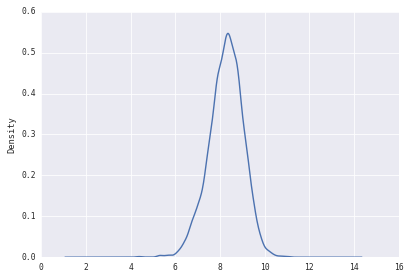

In [73]:
df.Y = np.log(df.Y)
df.Y.plot(kind = 'density')
df.head()

# Correlation Matrix

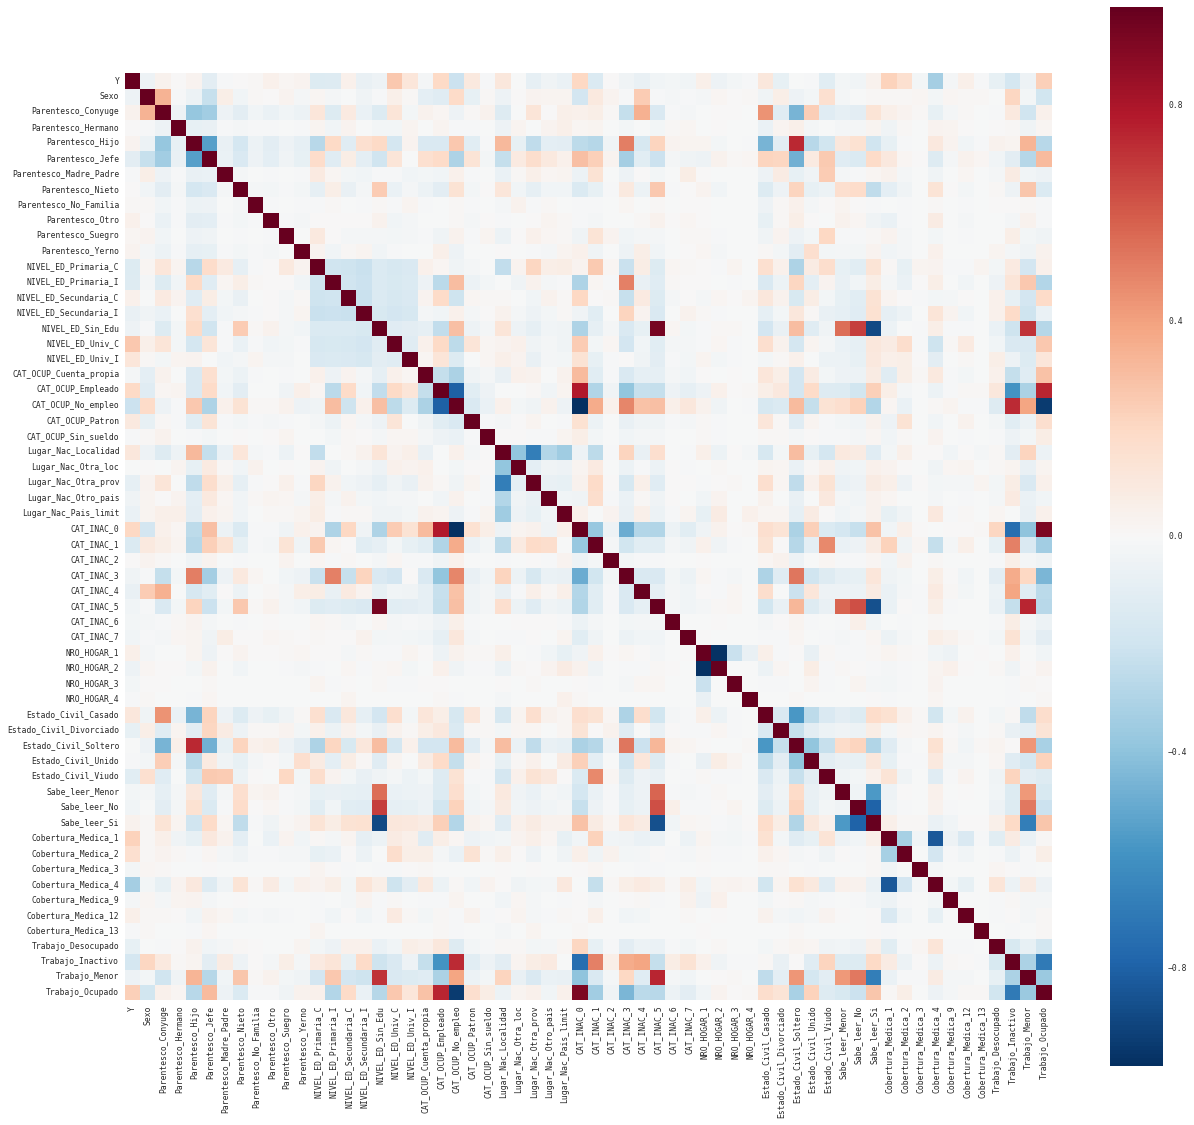

In [53]:
import seaborn as sns
sns.set(context="paper", font="monospace")

corrmat = df.corr()
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(corrmat, vmax=.8, square=True)
f.tight_layout()

# Linear Regression (WLS)

In [74]:
# get percentile as int

# from scipy import stats
# rankdata = stats.rankdata(Y, "average")/len(Y)

Y = df.Y
X = df.ix[:,1:]

In [75]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
wls_model = sm.WLS(Y,X1, weights = weights)
results = wls_model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.303
Model:                            WLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     69.14
Date:                Wed, 30 Nov 2016   Prob (F-statistic):               0.00
Time:                        11:47:07   Log-Likelihood:                -8221.9
No. Observations:                8323   AIC:                         1.655e+04
Df Residuals:                    8270   BIC:                         1.692e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                     

# Linear Regression (sklearn)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 200)

In [57]:
# sk-learn (Y ~ x) with intercept
from sklearn.linear_model import LinearRegression

R_IS=[]
R_OS=[]

n = 10
for i in range(n):  
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train, sample_weight = weights[:len(X_train)])
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
    
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 10 times is 0.278070108368
OS R-squared for 10 times is -1.22686989748e+19


# **LOGISTIC REGRESSION**

In [58]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/Users/IlanReinstein/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [60]:
encoded_data, _ = number_encode_features(df)

In [61]:
# print all features and their relevance (takes some time)
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20,20))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values(inplace = True)
coefs.plot(kind="bar")

ValueError: Unknown label type: 'continuous'

# **RIDGE REGRESSION**

In [62]:
import statsmodels.formula.api as smf
from scipy import stats
from pandas.stats.api import ols
from sklearn import linear_model

In [63]:
Ridge=linear_model.Ridge(fit_intercept=True, alpha=1)

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.312149973091
The R-squared we found for OS Ridge is: 0.276840643729


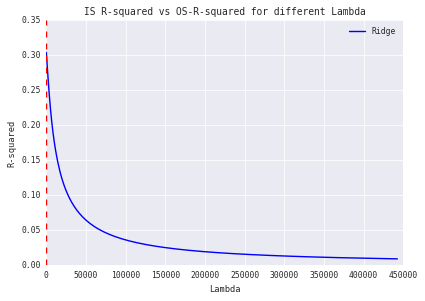

Optimal lambda for Ridge=11.2131301574


In [64]:
#select best lambda for Ridge
lambdas = np.exp(np.linspace(-5,13,200))
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

# **LASSO REGRESSION**

In [65]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=1000000)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.312149973091
The R-squared we found for OS Lasso is: -1.55431223448e-15


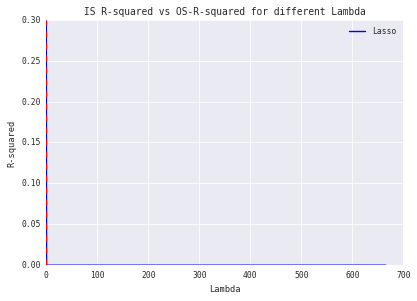

Optimal lambda for Lasso=0.00673794699909


In [66]:
#select lambdas for Lasso 
lambdas=np.exp(np.linspace(-5,6.5,200))
lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))

# **OLS PERFORMANCE COMPARISON**

In [67]:
# Source: ADS Practice Lab 2016

Number_variables=range(len(X_train.columns[:]))

# #select best lambda for Ridge
# lambdas = np.exp(np.linspace(-5,13,200))
# lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)

# #select lambdas for Lasso 
# lambdas=np.exp(np.linspace(-5,6.5,200))
# lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=True)

OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

Ridge=linear_model.Ridge(fit_intercept=True,alpha=1)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=1)

for j in Number_variables:
    # OLS
    lm = smf.ols(formula = 'Y ~ '+ '+'.join(X_train.columns[:j+1]), 
                 data = pd.concat([X_train.ix[:,:j+1],y_train], axis=1)).fit()
    error = lm.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train.ix[:,:j+1],y_train)
    
    # In sample:
    err_IS=Ridge.predict(X_train.ix[:,:j+1]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train.ix[:,0:j+1],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train.ix[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test.ix[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))


pylab.rcParams['figure.figsize'] = [14,10]

plt.title('OS performance of OLS when we subsequently add variables')

plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.legend(loc='lower right')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'ix'

## Pipeline Anova SVM

In [68]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.SVC(kernel='linear')

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)
print("ANOVA Score: {}".format(anova_svm.score(X_train,y_train)))

ValueError: Unknown label type: 'continuous'

# Random Forest

In [17]:
# Random Forest Classification
import pandas
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

num_folds = 10
num_instances = len(X)
seed = 7
num_trees = 100
max_features = 3
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_validation.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.00921052631579


## Plot the decision boundaries of a VotingClassifier (SVC vs DecisionTree vs K-neighbours)

In [339]:
X = np.asarray(X_train)
Y = np.asarray(y_train)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])

clf1 = clf1.fit(X,Y)
clf2 = clf2.fit(X,Y)
clf3 = clf3.fit(X,Y)
eclf = eclf.fit(X,Y)

In [ ]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 60 and input n_features is 2 

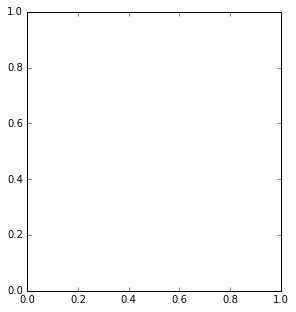

In [391]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(len(X), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
X = X_train
y = y_train
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X.ix[:, 0].min() - 1, X.ix[:, 0].max() + 1
y_min, y_max = X.ix[:, 1].min() - 1, X.ix[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## **PCA**

### No funciona bien para multivariate regression. Tenemos muchos datos categoricos

In [16]:
nad = pd.concat([X,Y], axis=1)

In [20]:
X,y = X,Y

## SVM-Anova: SVM with univariate feature selection

/gpfs/fs01/user/s354-79e1eae297cf06-da1f292c4b52/.local/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [40 55] are constant.
  UserWarning)


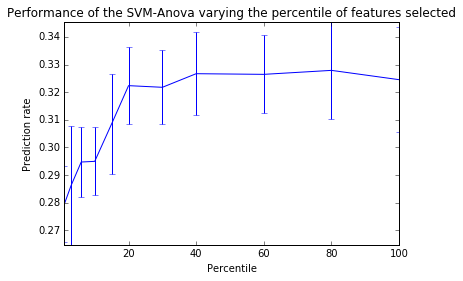

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, feature_selection
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

transform = feature_selection.SelectPercentile(feature_selection.f_classif)

clf = Pipeline([('anova', transform), ('svc', svm.SVC(C=1.0))])

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using 1 CPU
    this_scores = cross_val_score(clf, X, y, n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()

## Pipelining: chaining a PCA and a logistic regression

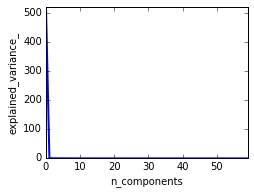

In [27]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

pca.fit(X_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

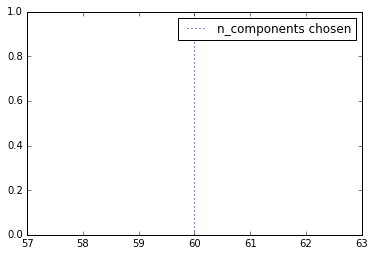

In [29]:
n_components = [20, 40, 60]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

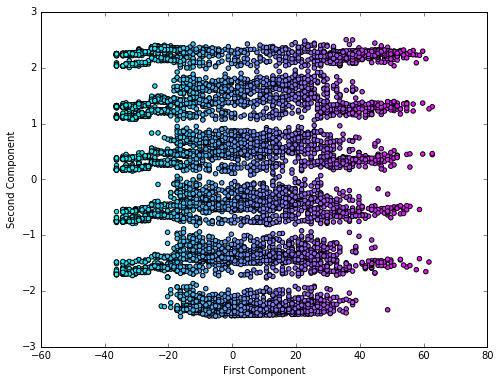

In [17]:
n=2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

nad_ = StandardScaler().fit_transform(nad)

pca = PCA(n)
Xproj = pca.fit_transform(nad)
eigenvalues = pca.explained_variance_

plt.figure(2, figsize=(8, 6))
plt.scatter(Xproj[:, 0], Xproj[:, 1], c = nad.sum(axis=1), cmap=plt.cm.cool)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

In [279]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

X_ = np.asarray(nad)
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X_)
    silhouette_avg = silhouette_score(X_, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is :0.595538068807
For n_clusters = 3, the average silhouette_score is :0.537221913843
For n_clusters = 4, the average silhouette_score is :0.501805531701
For n_clusters = 5, the average silhouette_score is :0.483144350648
For n_clusters = 6, the average silhouette_score is :0.456988255653
For n_clusters = 7, the average silhouette_score is :0.427559903572


# Kmeans Clustering

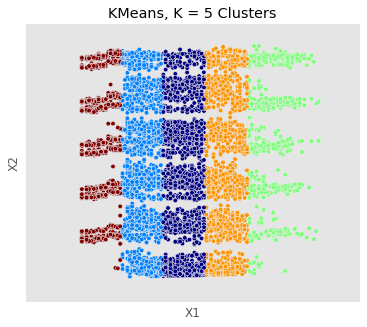

In [18]:
from sklearn.cluster import KMeans

n=5
dd=Xproj

km=KMeans(n_clusters=n)
res=km.fit(dd)

with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 5))
    plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_)
    plt.ylabel('X2')
    plt.xlabel('X1')
    plt.xticks(())
    plt.yticks(())
    plt.title("KMeans, K = {} Clusters".format(n))
    plt.show()

# Gaussian Mixture

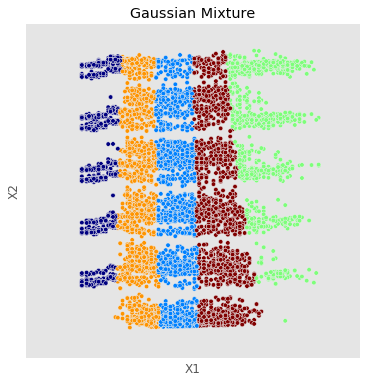

In [19]:
from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=n)
res1=gm.fit(dd)

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,6))
    plt.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xticks(())
    plt.yticks(())
    plt.title("Gaussian Mixture")
    plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=n)
res1=gm.fit(dd)

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,6))
    plt.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xticks(())
    plt.yticks(())
    plt.title("Gaussian Mixture")
    plt.show()

In [27]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(nad)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 89


NameError: name 'labels_true' is not defined

# Feature selection

## Recursive Feature Elimination

In [57]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
X = X
Y = Y
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False False]
Feature Ranking: [56 58 13 57 51  3 34 23  8  5 24 52 30 29 54 31 28  1 38 53 40 39 18  7 46
 42 47 44 45 35 26  9 50 32 27 25 49 19  6 17 48 43 14 16 55 15 22 21 20 12
 11  1  1  2 10 41 33 36 37  4]


In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
X = X
Y = Y
names = df.columns
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

Features sorted by their rank:
[(1.0, 'Cobertura_Medica_9'), (2.0, 'Cobertura_Medica_1'), (3.0, 'Cobertura_Medica_2'), (4.0, 'Cobertura_Medica_3'), (5.0, 'Sabe_leer_No'), (6.0, 'Cobertura_Medica_4'), (7.0, 'Sabe_leer_Si'), (8.0, 'CAT_OCUP_Empleado'), (9.0, 'NIVEL_ED_Univ_I'), (10.0, 'NIVEL_ED_Univ_C'), (11.0, 'CAT_OCUP_No_empleo'), (12.0, 'CAT_OCUP_Cuenta_propia'), (13.0, 'Trabajo_Desocupado'), (14.0, 'Lugar_Nac_Otro_pais'), (15.0, 'Cobertura_Medica_13'), (16.0, 'NIVEL_ED_Secundaria_I'), (17.0, 'NIVEL_ED_Sin_Edu'), (18.0, 'NIVEL_ED_Primaria_C'), (19.0, 'NIVEL_ED_Primaria_I'), (20.0, 'NIVEL_ED_Secundaria_C'), (21.0, 'Parentesco_Yerno'), (22.0, 'Parentesco_Suegro'), (23.0, 'Parentesco_Nieto'), (24.0, 'Parentesco_Otro'), (25.0, 'Parentesco_Madre_Padre'), (26.0, 'Parentesco_Jefe'), (27.0, 'Parentesco_Conyuge'), (28.0, 'Edad'), (29.0, 'Parentesco_Hijo'), (30.0, 'Sexo'), (31.0, 'Parentesco_No_Familia'), (32.0, 'Parentesco_Hermano'), (33.0, 'CAT_INAC_6'), (34.0, 'CAT_INAC_7'), (35.0, 'NRO_HOG

## Univariate Selection

In [61]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
names = df.columns
X = X
Y = Y
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(np.asarray(X), Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(np.asarray(X))
# summarize selected features
print(features[0:5,:])

ValueError: Input X must be non-negative.

## Stability selection

In [62]:
from sklearn.linear_model import RandomizedLasso
 
#using the Boston housing data. 
#Data gets scaled automatically by sklearn's implementation
X = X
Y = Y
names = df.columns
 
rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X, Y)
 
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True)

Features sorted by their score:
[(0.0, 'Y'), (0.0, 'Trabajo_Inactivo'), (0.0, 'Trabajo_Desocupado'), (0.0, 'Sexo'), (0.0, 'Sabe_leer_Si'), (0.0, 'Sabe_leer_No'), (0.0, 'Sabe_leer_Menor'), (0.0, 'Parentesco_Yerno'), (0.0, 'Parentesco_Suegro'), (0.0, 'Parentesco_Otro'), (0.0, 'Parentesco_No_Familia'), (0.0, 'Parentesco_Nieto'), (0.0, 'Parentesco_Madre_Padre'), (0.0, 'Parentesco_Jefe'), (0.0, 'Parentesco_Hijo'), (0.0, 'Parentesco_Hermano'), (0.0, 'Parentesco_Conyuge'), (0.0, 'NRO_HOGAR_4'), (0.0, 'NRO_HOGAR_3'), (0.0, 'NRO_HOGAR_2'), (0.0, 'NRO_HOGAR_1'), (0.0, 'NIVEL_ED_Univ_I'), (0.0, 'NIVEL_ED_Univ_C'), (0.0, 'NIVEL_ED_Sin_Edu'), (0.0, 'NIVEL_ED_Secundaria_I'), (0.0, 'NIVEL_ED_Secundaria_C'), (0.0, 'NIVEL_ED_Primaria_I'), (0.0, 'NIVEL_ED_Primaria_C'), (0.0, 'Lugar_Nac_Pais_limit'), (0.0, 'Lugar_Nac_Otro_pais'), (0.0, 'Lugar_Nac_Otra_prov'), (0.0, 'Lugar_Nac_Otra_loc'), (0.0, 'Lugar_Nac_Localidad'), (0.0, 'Estado_Civil_Viudo'), (0.0, 'Estado_Civil_Unido'), (0.0, 'Estado_Civil_Soltero'),

# Example: running the methods side by side

In [84]:
Y = q
X = df.iloc[:,2:]

In [83]:
# !pip install minepy

from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE
 
X = np.asarray(X)
# Y = Y
    
names = X.columns
 
ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
 
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
 
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)
 
ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
 
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
feat_ranking = pd.DataFrame(ranks)
cols = feat_ranking.columns.tolist()
cols.insert(0, cols.pop(cols.index('Mean')))
feat_ranking = feat_ranking.ix[:, cols]
feat_ranking.sort_values(['Mean'], ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [82]:
r['Trabajo_Ocupado']

KeyError: 'Trabajo_Ocupado'

In [74]:
for name in names:
    print name
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

Sexo
Edad
Parentesco_Conyuge
Parentesco_Hermano
Parentesco_Hijo
Parentesco_Jefe
Parentesco_Madre_Padre
Parentesco_Nieto
Parentesco_No_Familia
Parentesco_Otro
Parentesco_Suegro
Parentesco_Yerno
NIVEL_ED_Primaria_C
NIVEL_ED_Primaria_I
NIVEL_ED_Secundaria_C
NIVEL_ED_Secundaria_I
NIVEL_ED_Sin_Edu
NIVEL_ED_Univ_C
NIVEL_ED_Univ_I
CAT_OCUP_Cuenta_propia
CAT_OCUP_Empleado
CAT_OCUP_No_empleo
CAT_OCUP_Patron
CAT_OCUP_Sin_sueldo
Lugar_Nac_Localidad
Lugar_Nac_Otra_loc
Lugar_Nac_Otra_prov
Lugar_Nac_Otro_pais
Lugar_Nac_Pais_limit
CAT_INAC_0
CAT_INAC_1
CAT_INAC_2
CAT_INAC_3
CAT_INAC_4
CAT_INAC_5
CAT_INAC_6
CAT_INAC_7
NRO_HOGAR_1
NRO_HOGAR_2
NRO_HOGAR_3
NRO_HOGAR_4
Estado_Civil_Casado
Estado_Civil_Divorciado
Estado_Civil_Soltero
Estado_Civil_Unido
Estado_Civil_Viudo
Sabe_leer_Menor
Sabe_leer_No
Sabe_leer_Si
Cobertura_Medica_1
Cobertura_Medica_2
Cobertura_Medica_3
Cobertura_Medica_4
Cobertura_Medica_9
Cobertura_Medica_12
Cobertura_Medica_13
Trabajo_Desocupado
Trabajo_Inactivo
Trabajo_Menor


KeyError: 'Trabajo_Menor'